# COVID-19 데이터 전처리

In [ ]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# date time
from datetime import datetime

In [ ]:
covid_19_confirmed = pd.read_csv('/content/drive/My Drive/Colab/COVID19/COVID/time_series_covid19_confirmed_global.csv')
covid_19_deaths = pd.read_csv('/content/drive/My Drive/Colab/COVID19/COVID/time_series_covid19_deaths_global.csv')
covid_19_recovered = pd.read_csv('/content/drive/My Drive/Colab/COVID19/COVID/time_series_covid19_recovered_global.csv')

In [ ]:
data = covid_19_confirmed[covid_19_confirmed['Country/Region'] == 'Korea, South']
# covid_19_deaths[covid_19_deaths['Country/Region'] == 'Korea, South']
# covid_19_recovered[covid_19_recovered['Country/Region'] == 'Korea, South']

In [ ]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
143,NaN,"Korea, South",36.0,128.0,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,...,8565,8652,8799,8961,8961,9037,9137,9241,9332,9478,9583,9661,9786,9887,9976,10062,10156,10237,10284,10331,10384,10423,10450,10480,10512,10537,10564,10591,10613,10635,10653,10661,10674,10683,10694,10708,10718,10728,10738,10752


In [ ]:
col_names = []
for col in data.columns: 
  col_names.append(col)
for i in range(4):
  col_names.pop(0)

In [ ]:
# confirmed_values = []
# for i in range(len(col_names)):
#   confirmed_values.append(data[col_names[i]].values[0])
# confirmed_values

In [ ]:
confirmed_values = []
for i in range(len(col_names)):
  if i == 0:
    confirmed_values.append(data[col_names[i]].values[0])
  else:
    confirmed_values.append(data[col_names[i]].values[0]- data[col_names[i-1]].values[0])
# confirmed_values

In [ ]:
dates_list = []
for i in range(len(col_names)):
  year = 2000 + int(col_names[i][len(col_names[i])-2]) * 10 + int(col_names[i][len(col_names[i])-1])
  month = int(col_names[i][0])
  if len(col_names[i]) == 6:
    date = int(col_names[i][2])
  else:
    date = int(col_names[i][2]) * 10 + int(col_names[i][3])
  dates_list.append(str(year) + '-' + str(month) + '-' + str(date))

In [ ]:
confirmed_values_df = pd.DataFrame(dict(date = dates_list,
                             confirmed = confirmed_values))

In [ ]:
confirmed_values_df.head()

,date,confirmed
0,2020-1-22,1
1,2020-1-23,0
2,2020-1-24,1
3,2020-1-25,0
4,2020-1-26,1


In [ ]:
confirmed_values_np = confirmed_values_df.to_numpy()
dates_list = np.array(np.hsplit(confirmed_values_np,2)).reshape(2,97)[0]
Y = np.array(np.hsplit(confirmed_values_np,2)).reshape(2,97)[1]
X = []

for date in dates_list:
    X.append(datetime.strptime(date, '%Y-%m-%d'))

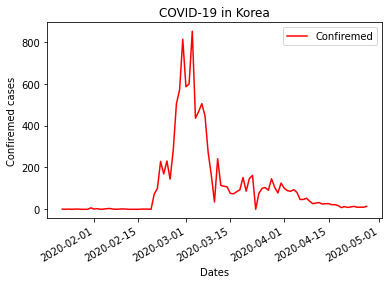

In [ ]:
plt.plot(X, Y, c = 'red', label='Confiremed')
plt.title("COVID-19 in Korea")
plt.xlabel("Dates")
plt.ylabel("Confiremed cases")
plt.legend()
plt.gcf().autofmt_xdate()
# plt.grid()

In [ ]:
confirmed_values_df[confirmed_values_df['date']=='2020-3-3']

,date,confirmed
41,2020-3-3,851


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


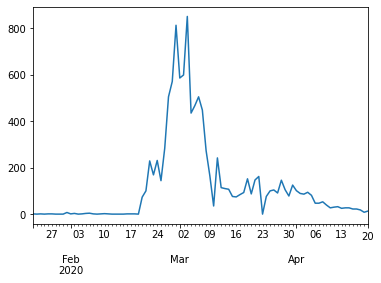

In [ ]:
data = pd.Series(Y, index = X)
data_ARIMA_cut = data.iloc[:90]
data_ARIMA_cut_float = data_ARIMA_cut[:].astype(np.float)
data_ARIMA_cut_float.plot()

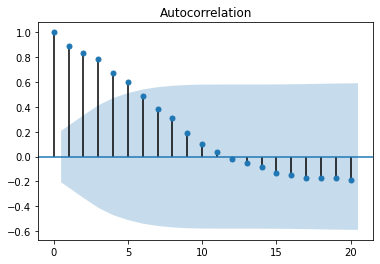

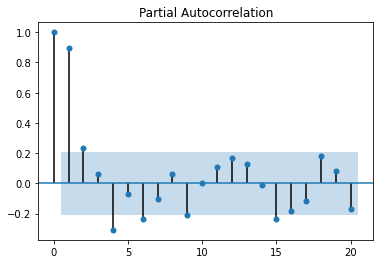

<Figure size 1440x288 with 0 Axes>

In [ ]:
plot_acf(data_ARIMA_cut_float)
plot_pacf(data_ARIMA_cut_float)
plt.figure(figsize=(20,4))
plt.show()

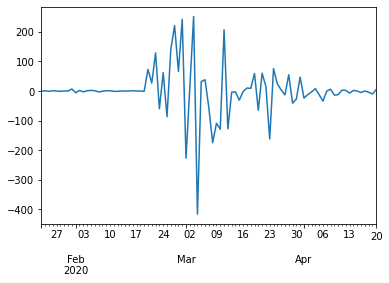

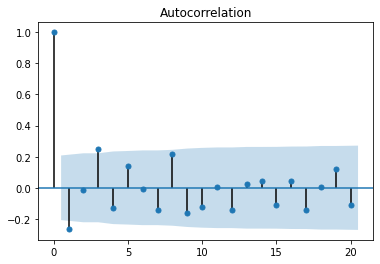

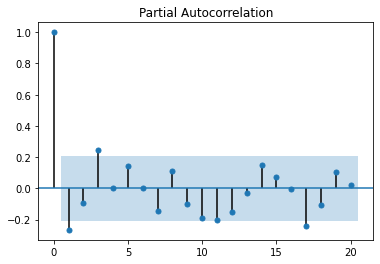

In [ ]:
diff_1 = data_ARIMA_cut_float.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [ ]:
ARIMA_model = ARIMA(data_ARIMA_cut_float, order=(1,1,0))
ARIMA_model_fit = ARIMA_model.fit(trend = 'nc', full_output = True, disp=1)
print(ARIMA_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   89
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -518.121
Method:                       css-mle   S.D. of innovations             81.634
Date:                Thu, 30 Apr 2020   AIC                           1040.241
Time:                        13:08:01   BIC                           1045.219
Sample:                    01-23-2020   HQIC                          1042.248
                         - 04-20-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -0.2607      0.102     -2.566      0.012      -0.460      -0.062
                                    Roots                                    
                  Real          Imaginary           M

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
SARIMAX_model = SARIMAX(data_ARIMA_cut_float, order=(1,1,0), seasonal_order = (1,1,1,12))
SARIMAX_model_fit = SARIMAX_model.fit(trend = 'nc', full_output = True, disp=1)
print(SARIMAX_model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   90
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -522.491
Date:                            Fri, 01 May 2020   AIC                           1054.982
Time:                                    09:39:00   BIC                           1067.481
Sample:                                01-22-2020   HQIC                          1060.023
                                     - 04-20-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9571      0.024     39.664      0.000       0.910       1.004
ma.L1         -0.2474      0.081   

In [ ]:
ARIMA_model_fit.plot_predict()
plt.show()

AttributeError: ignored

In [ ]:
fore = ARIMA_model_fit.forecast(steps = 7)
print(fore)

(array([11.69639101, 12.03627029, 11.94765635, 11.97075994, 11.96473633,
       11.96630682, 11.96589736]), array([ 81.63411829, 101.51990398, 121.03318339, 137.12469006,
       151.67760616, 164.9129161 , 177.17156603]), array([[-148.30354074,  171.69632276],
       [-186.93908522,  211.01162581],
       [-225.27302403,  249.16833674],
       [-256.78869396,  280.73021384],
       [-285.317909  ,  309.24738166],
       [-311.25706932,  335.18968295],
       [-335.28399114,  359.21578586]]))


In [ ]:
data.iloc[90:97]

2020-04-21     9
2020-04-22    11
2020-04-23    14
2020-04-24    10
2020-04-25    10
2020-04-26    10
2020-04-27    14
dtype: object

In [ ]:
covid_19_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27


In [ ]:
Global_Y = []
Global_Y.append(sum(covid_19_confirmed[col_names[0]]))
for i in range(1, len(col_names)):
  Global_Y.append(sum(covid_19_confirmed[col_names[i]])-sum(covid_19_confirmed[col_names[i-1]]))

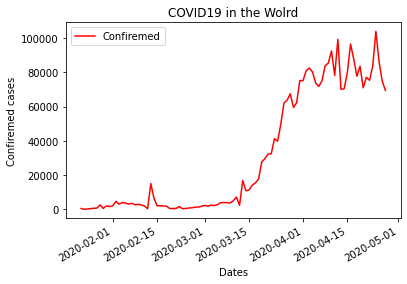

In [ ]:
plt.plot(X, Global_Y, c = 'red', label='Confiremed')
plt.title("COVID19 in the Wolrd")
plt.xlabel("Dates")
plt.ylabel("Confiremed cases")
plt.legend()
plt.gcf().autofmt_xdate()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

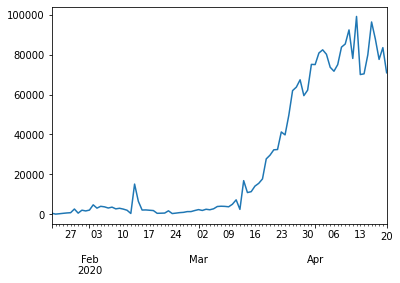

In [ ]:
data = pd.Series(Global_Y, index = X)
data_ARIMA_cut = data.iloc[:90]
data_ARIMA_cut_float = data_ARIMA_cut[:].astype(np.float)
data_ARIMA_cut_float.plot()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



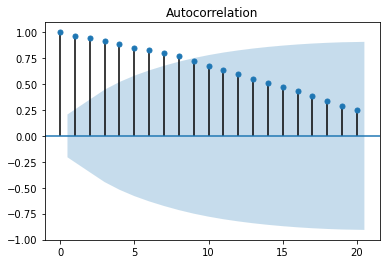

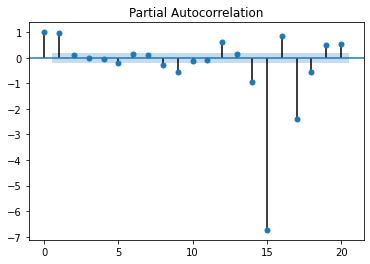

<Figure size 1440x288 with 0 Axes>

In [ ]:
plot_acf(data_ARIMA_cut_float)
plot_pacf(data_ARIMA_cut_float)
plt.figure(figsize=(20,4))
plt.show()

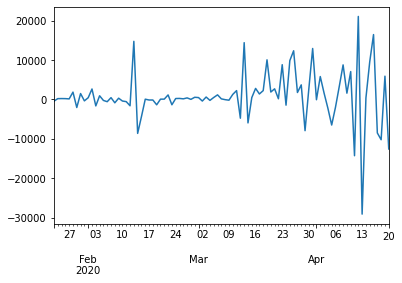

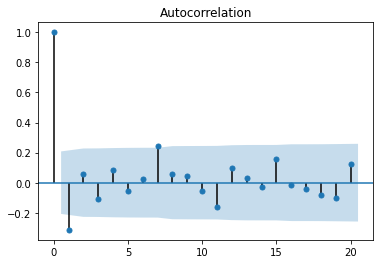

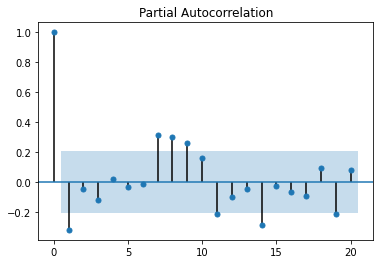

In [ ]:
diff_1 = data_ARIMA_cut_float.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [ ]:
ARIMA_model = ARIMA(data_ARIMA_cut_float, order=(1,1,0))
ARIMA_model_fit = ARIMA_model.fit(trend = 'nc', full_output = True, disp=1)
print(ARIMA_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   89
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -903.788
Method:                       css-mle   S.D. of innovations           6219.547
Date:                Thu, 30 Apr 2020   AIC                           1811.577
Time:                        13:03:08   BIC                           1816.554
Sample:                    01-23-2020   HQIC                          1813.583
                         - 04-20-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -0.3011      0.103     -2.933      0.004      -0.502      -0.100
                                    Roots                                    
                  Real          Imaginary           M

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
SARIMAX_model = SARIMAX(data_ARIMA_cut_float, order=(4,1,4))
SARIMAX_model_fit = SARIMAX_model.fit(trend = 'nc', full_output = True, disp=1)
print(SARIMAX_model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(4, 1, 4)   Log Likelihood                -893.006
Date:                Thu, 30 Apr 2020   AIC                           1804.013
Time:                        12:55:59   BIC                           1826.411
Sample:                    01-22-2020   HQIC                          1813.041
                         - 04-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0369      0.132      0.280      0.779      -0.221       0.295
ar.L2          0.2598      0.150      1.736      0.083      -0.034       0.553
ar.L3          0.5790      0.154      3.758      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



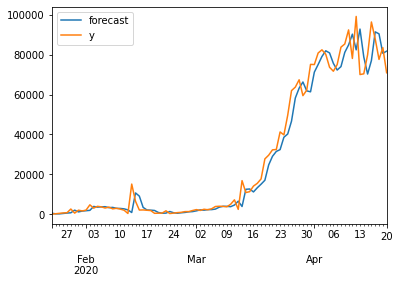

In [ ]:
ARIMA_model_fit.plot_predict()
plt.show()

In [ ]:
fore = model_fit.forecast(steps = 7)
print(fore)

(array([76127.8030496 , 75529.31146466, 76827.44332247, 77506.47052039,
       78387.58874559, 79202.73947619, 80039.42362369]), array([ 6123.12524164,  7382.62988665,  8793.25142039,  9907.06903354,
       10937.00814022, 11869.14082734, 12735.90290684]), array([[ 64126.69810316,  88128.90799603],
       [ 61059.62277564,  89999.00015369],
       [ 59592.9872315 ,  94061.89941345],
       [ 58088.97202231,  96923.96901847],
       [ 56951.44669213,  99823.73079904],
       [ 55939.65092717, 102465.8280252 ],
       [ 55077.51261568, 105001.33463171]]))


In [ ]:
data.iloc[90:97]

2020-04-21     77062
2020-04-22     75286
2020-04-23     83635
2020-04-24    103861
2020-04-25     86021
2020-04-26     74739
2020-04-27     69401
dtype: int64